# Import modules

In [1]:
from __future__ import division

import os; os.chdir(os.path.join('..', '..'))
print os.getcwd()

/Users/eharkin/Documents/School/Grad work/5HTGIF


In [2]:
import pickle

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%config InlineBackend.figure_format = 'retina'

# Load spike-triggered data

Load spike-triggered slices of input current and membrane voltage. Extracted from training set traces in `5HT_goodcells.ldat`.

In [3]:
DATA_PATH = os.path.join('data', 'processed', '5HT_fastnoise')

with open(os.path.join(DATA_PATH, '5HT_goodcells_spktrig.ldat'), 'rb') as f:
    spktrig = pickle.load(f)
    f.close()

In [4]:
spktrig = pd.DataFrame(spktrig)

spktrig.head()

I  \
0  [0.0022583008, 0.00012207031, 0.0014038087, 0....   
1  [0.052185062, 0.05499268, 0.05334473, 0.057983...   
2  [0.023620607, 0.025451662, 0.026306154, 0.0283...   
3  [-0.0058593755, -0.0065917973, -0.008544922, -...   
4  [0.006042481, 0.0041503906, 0.0043945312, 0.00...   

                                                   V   names  \
0  [-77.68016, -77.77548, -77.684265, -77.89398, ...  DRN307   
1  [-66.2882, -66.211365, -66.22667, -66.1423, -6...  DRN307   
2  [-53.668102, -53.52469, -53.495625, -53.56713,...  DRN307   
3  [-73.736855, -73.71146, -73.86844, -73.70187, ...  DRN307   
4  [-64.199905, -64.10098, -64.05457, -64.13236, ...  DRN307   

                                                   t  t_since_spk   t_spk  
0  [-200.0, -199.9, -199.79999, -199.69998, -199....          NaN  1568.1  
1  [-200.0, -199.9, -199.79999, -199.69998, -199....         71.9  1640.0  
2  [-200.0, -199.9, -199.79999, -199.69998, -199....       2474.7  4114.7  
3  [-200.0, -199.9, -199.79999, -199.69998, -199....        663.0  4777.7  
4  [-200.0, -199.9, -199.79999, -199.69998, -199....       2744.8  7522.5

See how data are laid out. Rows in the `DataFrame` correspond to individual spikes. The name of the cell from which each spike was taken is indicated. `t_since_spk` indicates the time (in ms) since the last spike, and is `NaN` if it is the first spike in the trace. 

# Plot preferred inputs

## Preferred input for each cell

In [5]:
plt.rc('lines', dashed_pattern = (10, 10))

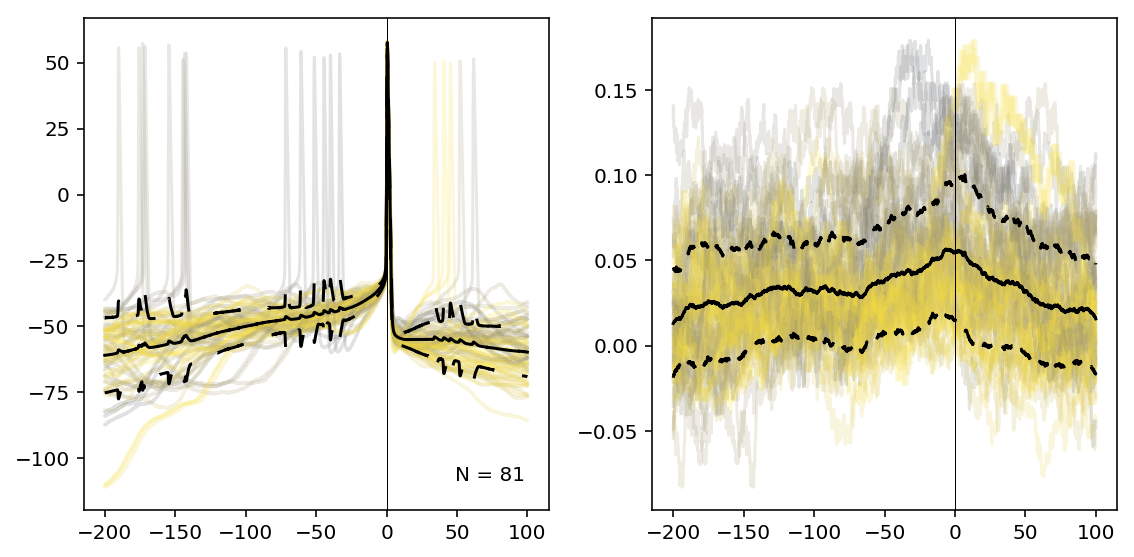

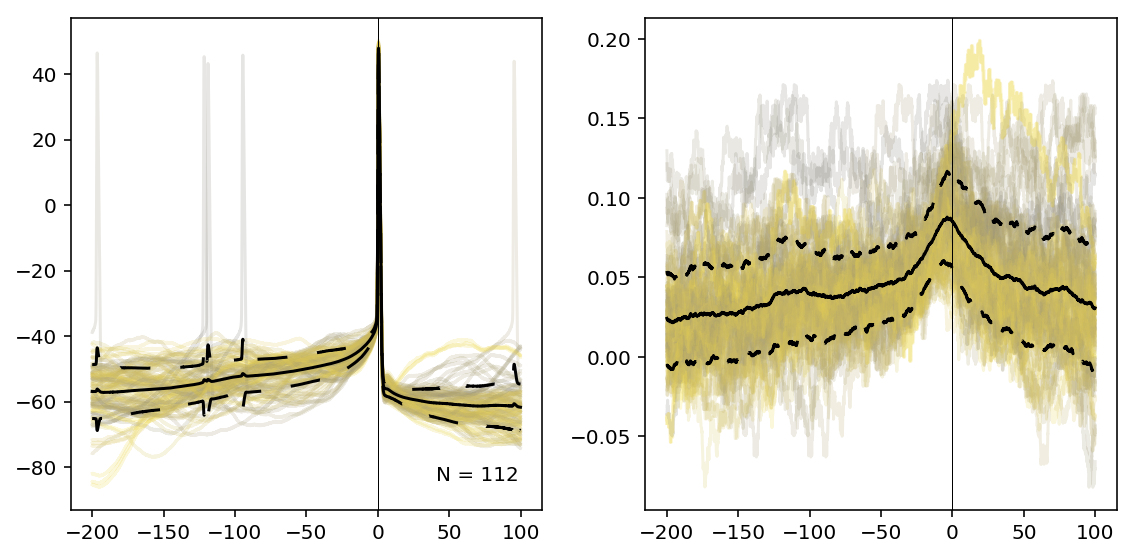

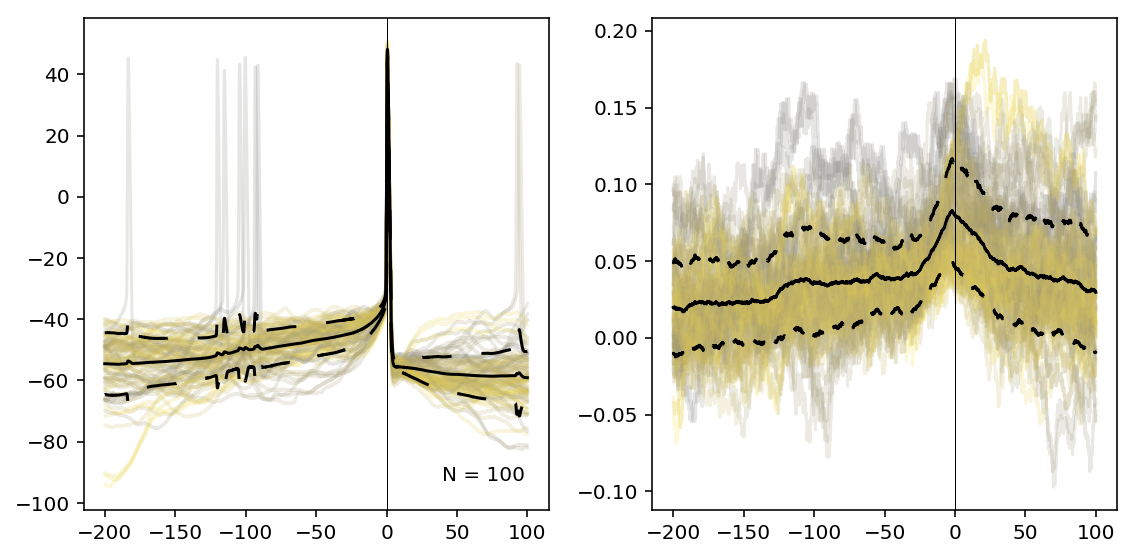

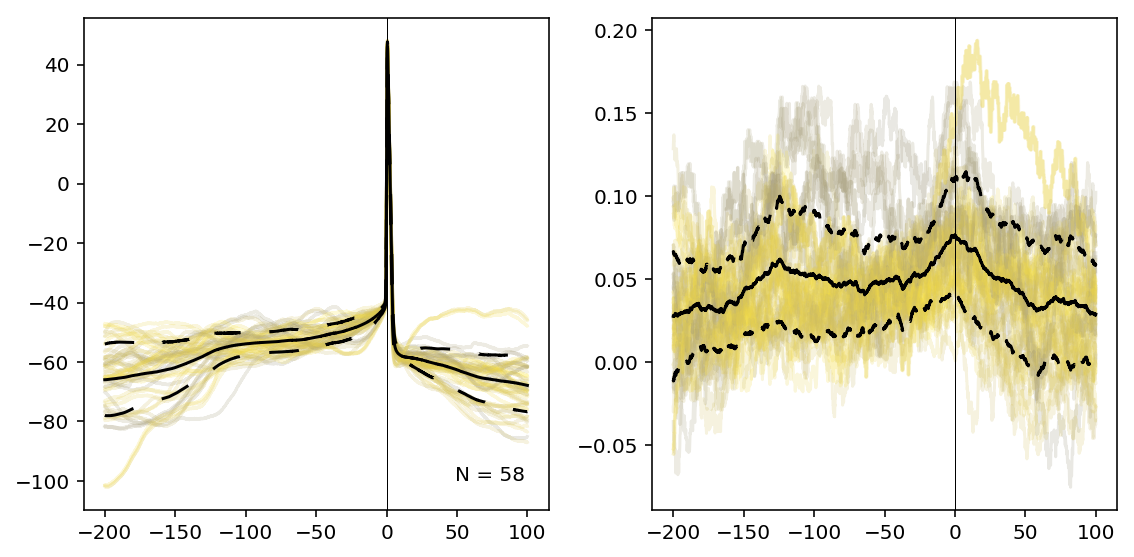

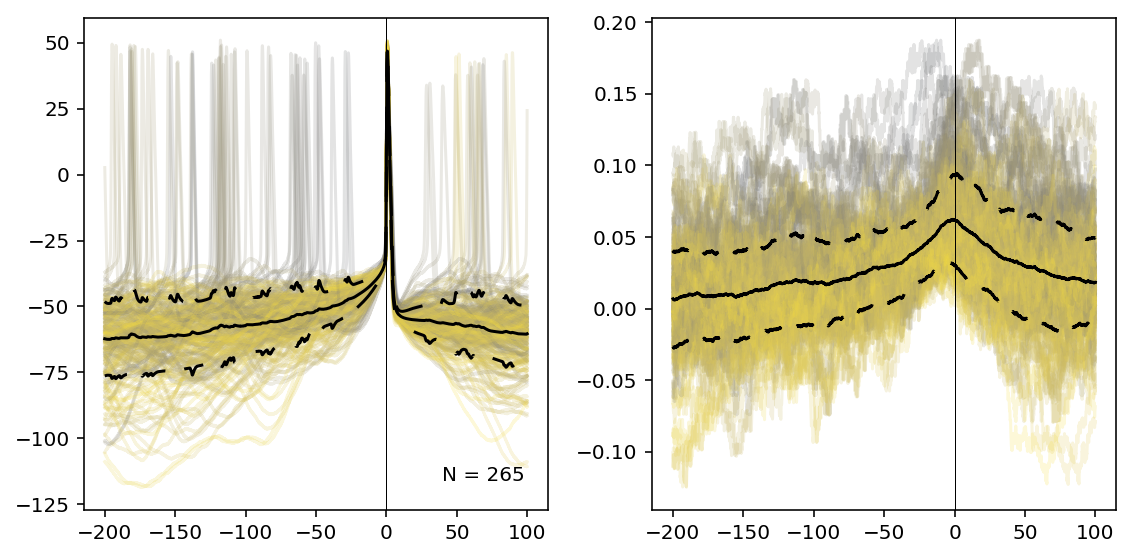

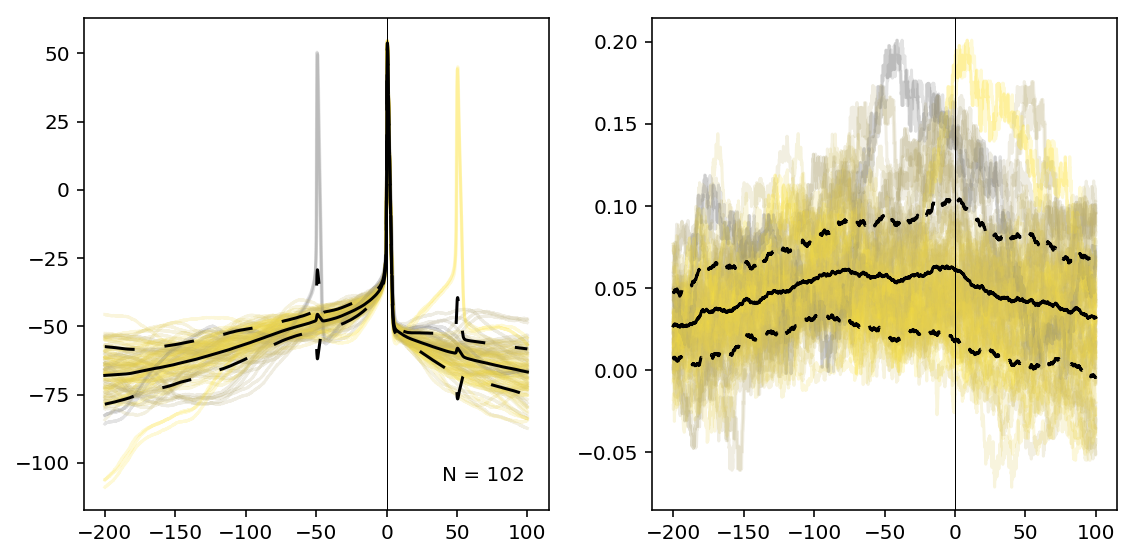

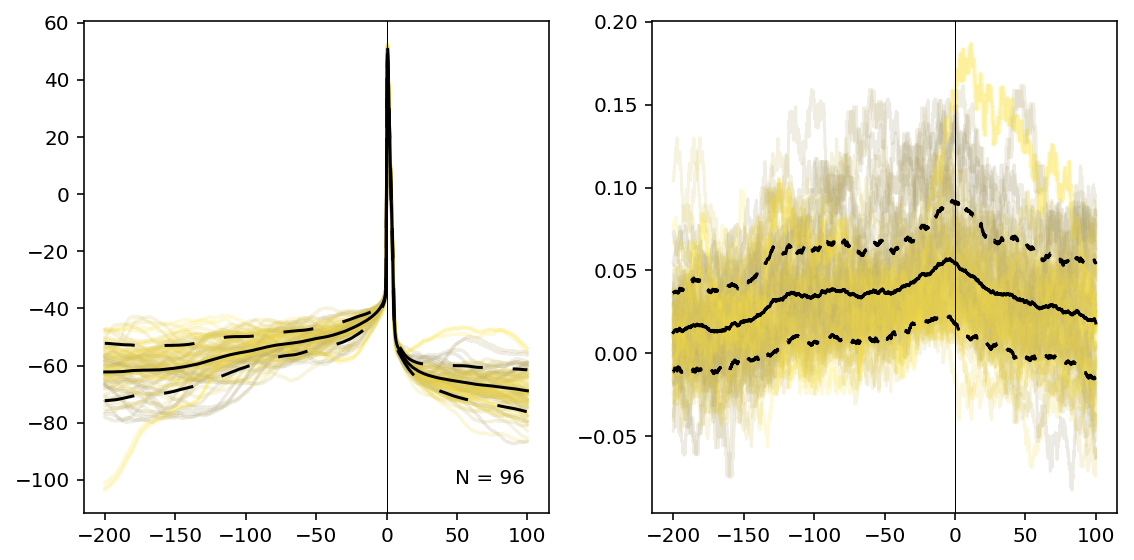

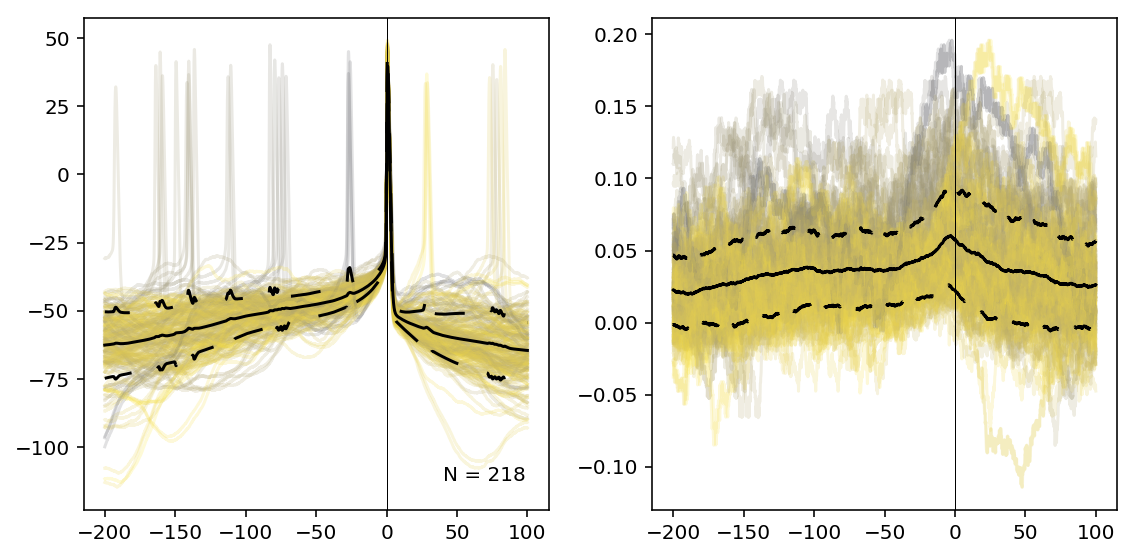

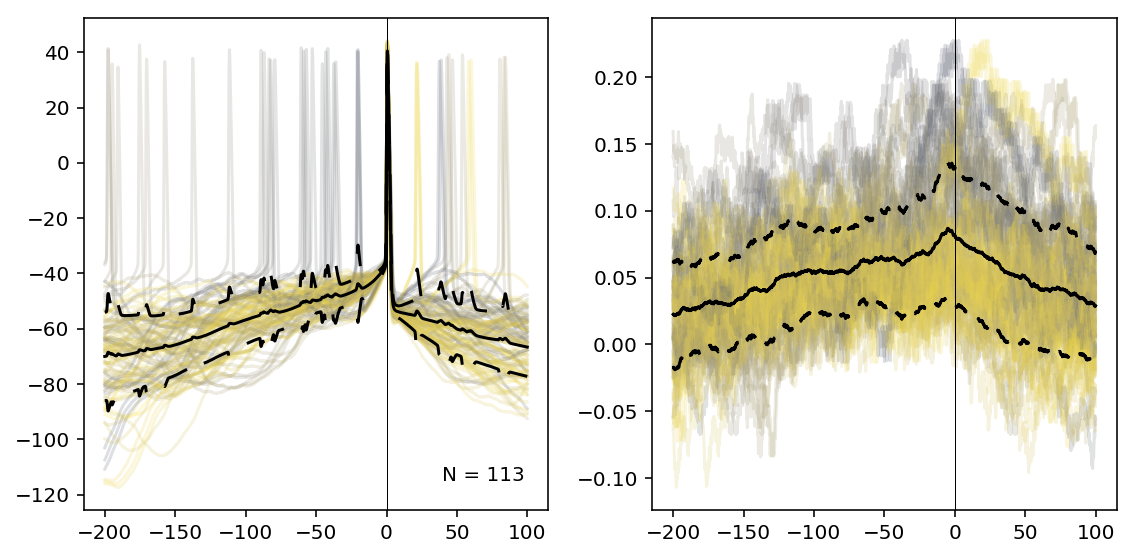

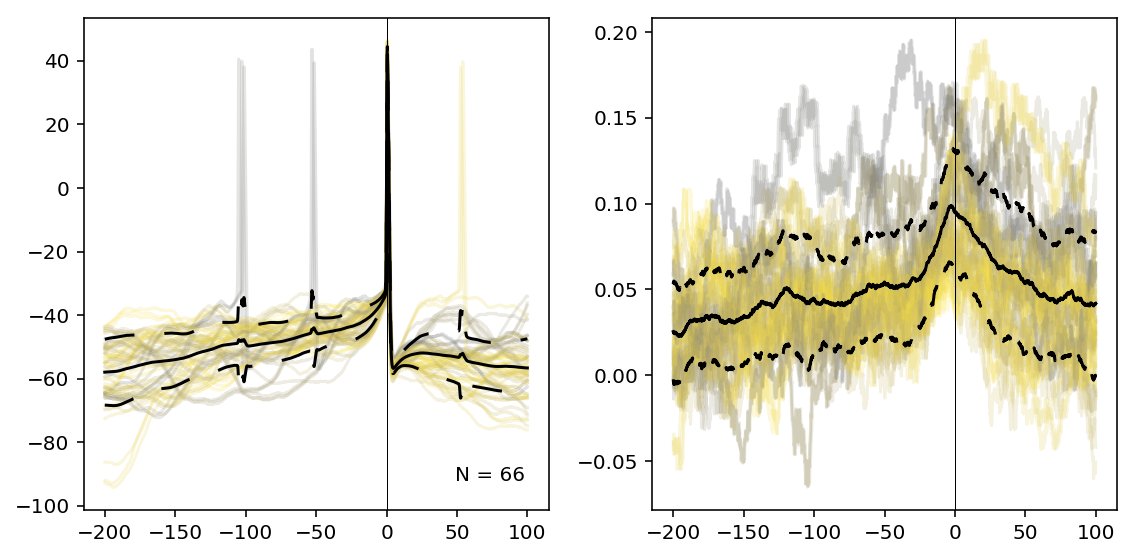

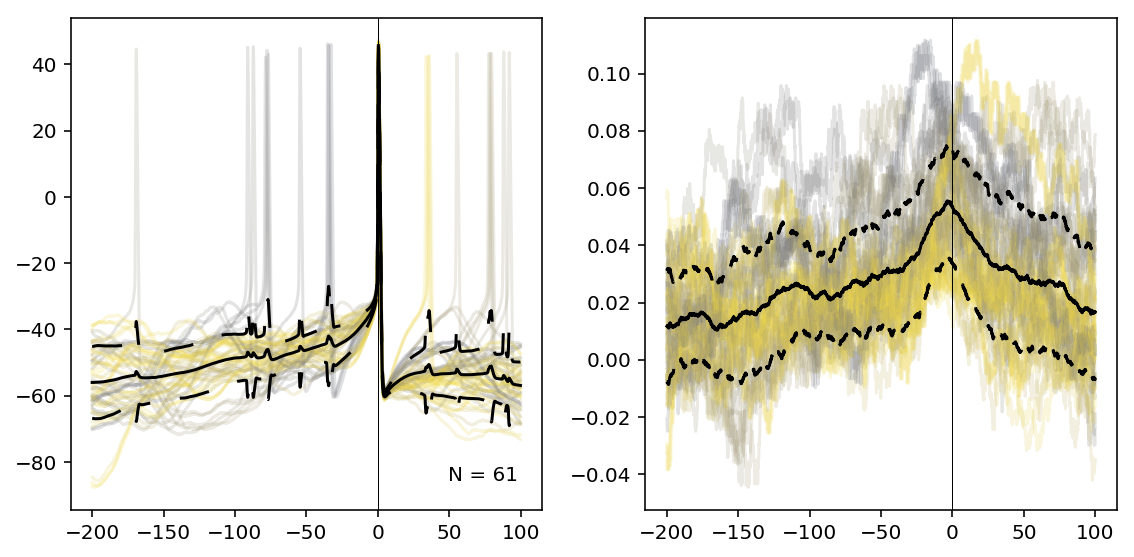

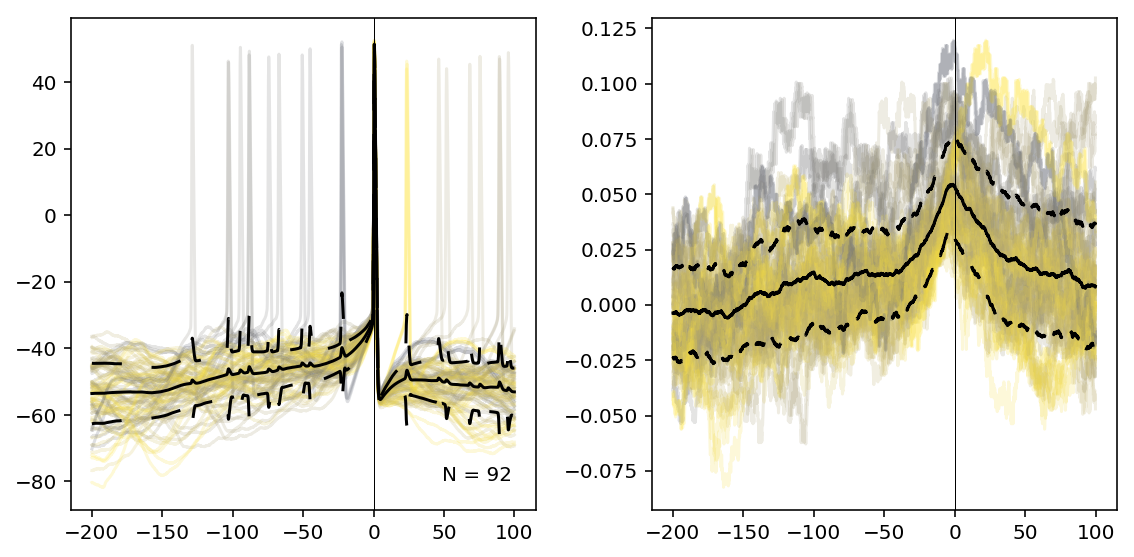

In [6]:
pref_stim = {
    'mean': [],
    'std': [], 
    'names': []
}

for name_ in spktrig['names'].unique():
    tmp_spktrig = spktrig[spktrig['names'] == name_]
    
    mask = ~np.isnan(tmp_spktrig['t_since_spk'].values.tolist())
    
    tmp_t_since_spk = np.log10(tmp_spktrig['t_since_spk'].values.tolist())[mask]
    tmp_t_since_spk /= tmp_t_since_spk.max()
    
    tmp_V = np.array(tmp_spktrig['V'].values.tolist())[mask, :]
    tmp_I = np.array(tmp_spktrig['I'].values.tolist())[mask, :]
    tmp_t = np.array(tmp_spktrig['t'].values.tolist())[mask, :]
    
    plt.figure(figsize = (8,4))
    V_ax = plt.subplot(121)
    I_ax = plt.subplot(122)
    for i in range(len(tmp_t_since_spk)):
        
        V_ax.plot(
            tmp_t[i,:], tmp_V[i,:], 
            '-', color = plt.cm.cividis(tmp_t_since_spk[i]),
            alpha = 0.2
        )
        
        I_ax.plot(
            tmp_t[i,:], tmp_I[i,:], 
            '-', color = plt.cm.cividis(tmp_t_since_spk[i]),
            alpha = 0.2
        )
        
    V_ax.plot(
        tmp_t.mean(axis = 0), tmp_V.mean(axis = 0), 'k-'
    )
    V_ax.plot(
        tmp_t.mean(axis = 0), tmp_V.mean(axis = 0) - tmp_V.std(axis = 0), 'k--'
    )
    V_ax.plot(
        tmp_t.mean(axis = 0), tmp_V.mean(axis = 0) + tmp_V.std(axis = 0), 'k--'
    )
    V_ax.axvline(0, color = 'k', lw = 0.5)
    V_ax.text(
        0.95, 0.05, 
        'N = {}'.format(len(tmp_t_since_spk)),
        ha = 'right', va = 'bottom', transform = V_ax.transAxes
    )
    
    I_ax.plot(
        tmp_t.mean(axis = 0), tmp_I.mean(axis = 0), 'k-'
    )
    I_ax.plot(
        tmp_t.mean(axis = 0), tmp_I.mean(axis = 0) - tmp_I.std(axis = 0), 'k--'
    )
    I_ax.plot(
        tmp_t.mean(axis = 0), tmp_I.mean(axis = 0) + tmp_I.std(axis = 0), 'k--'
    )
    I_ax.axvline(0, color = 'k', lw = 0.5)
    
    pref_stim['mean'].append(tmp_I.mean(axis = 0))
    pref_stim['std'].append(tmp_I.std(axis = 0))
    pref_stim['names'].append(name_)
        
    plt.tight_layout()
    plt.show()

This is pretty data-dense... Each set of plots is for one cell, with the spike-triggered voltage traces on the left and spike-triggered current traces on the right. Color indicates log time since last spike (black means last spike was recent). Solid black line is mean, dashed black lines are +/- 1SD. Thin vertical black line is the time the spike was detected.

## Preferred input trends across cells

In [7]:
pref_stim['mean'] = np.array(pref_stim['mean'])
pref_stim['std'] = np.array(pref_stim['std'])

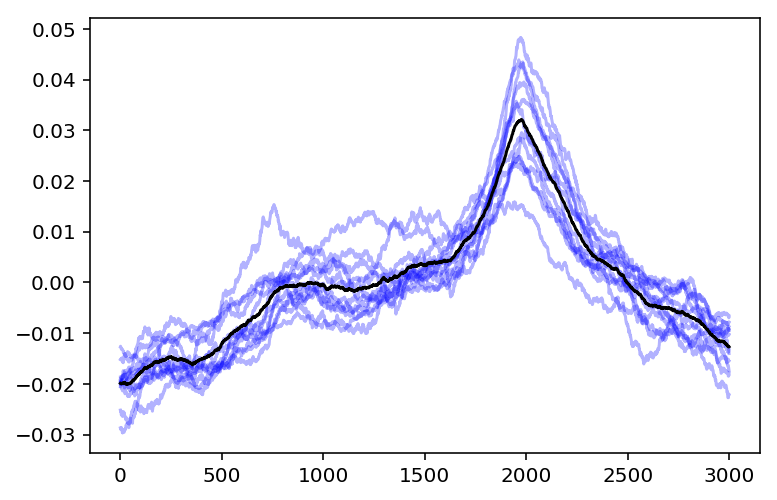

In [8]:
centered_mean = pref_stim['mean'] - pref_stim['mean'].mean(axis = 1)[:, np.newaxis]

plt.plot(centered_mean.T, 'b-', alpha = 0.3)
plt.plot(centered_mean.mean(axis = 0), 'k-')
#plt.yticks([])

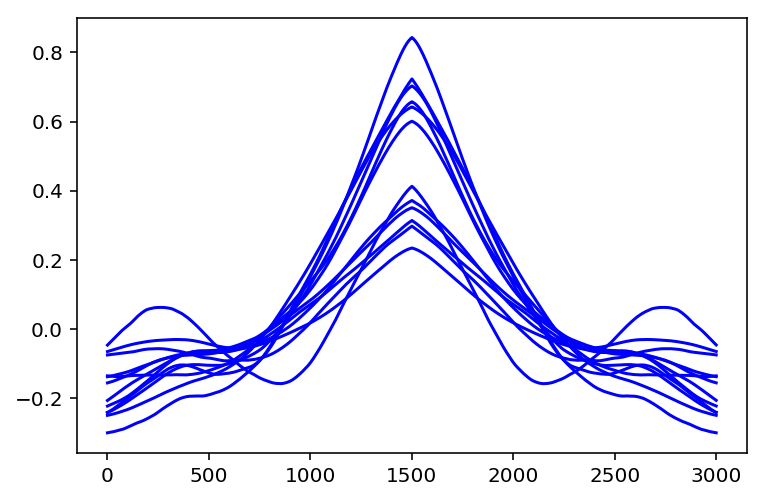

In [9]:
for i in range(centered_mean.shape[0]):
    plt.plot(np.convolve(centered_mean[i, :], np.flip(centered_mean[i, :]), 'same'), 'b-')

# Load corresponding experiments

Load the traces from which the spike-triggered slices were extracted. We can check to see whether a high cross-correlation between the spike triggered input slice and the input current predicts spikes.

In [10]:
with open(os.path.join(DATA_PATH, '5HT_goodcells.ldat'), 'rb') as f:
    experiments = pickle.load(f)
    f.close()

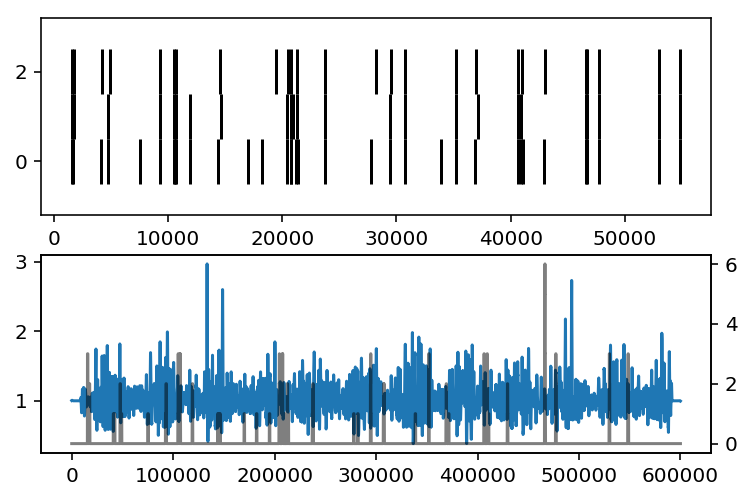

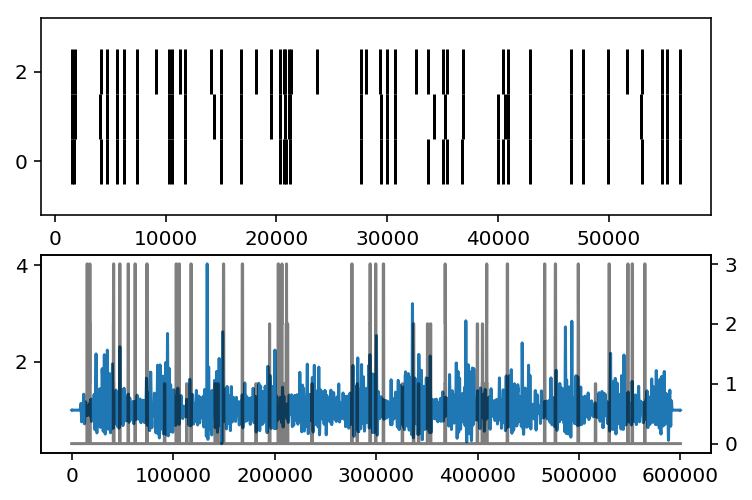

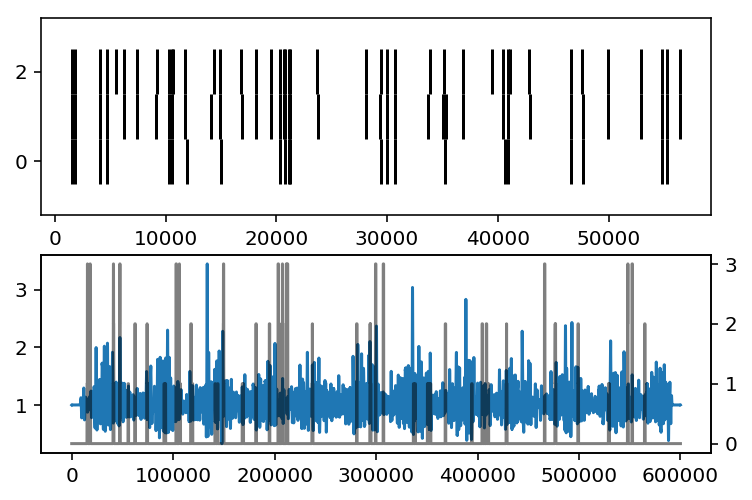

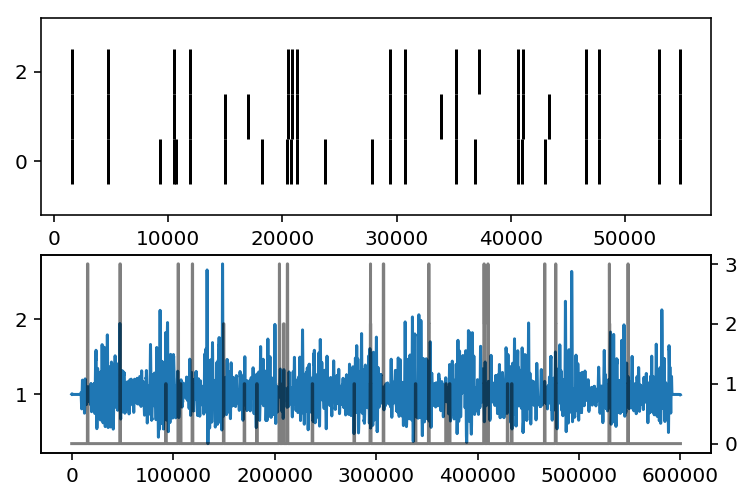

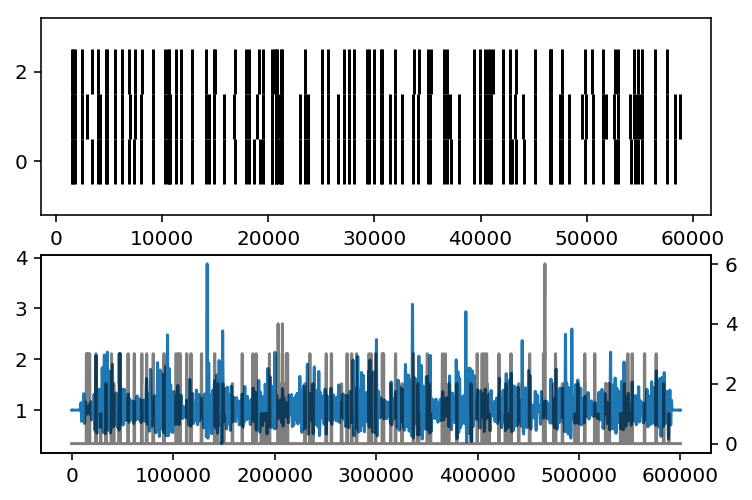

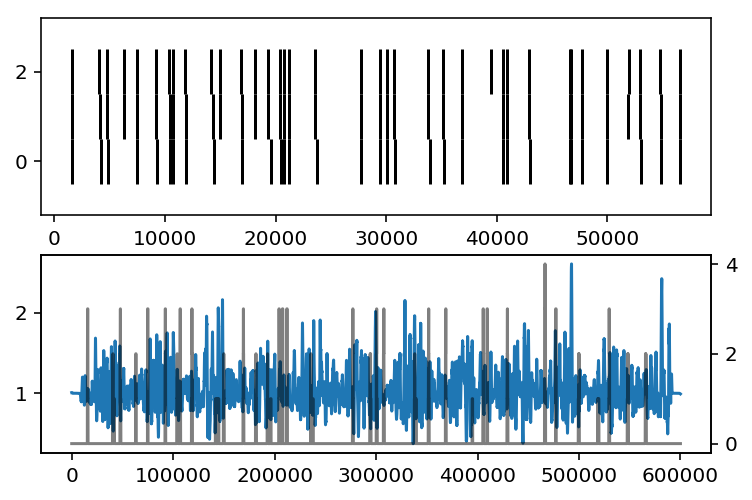

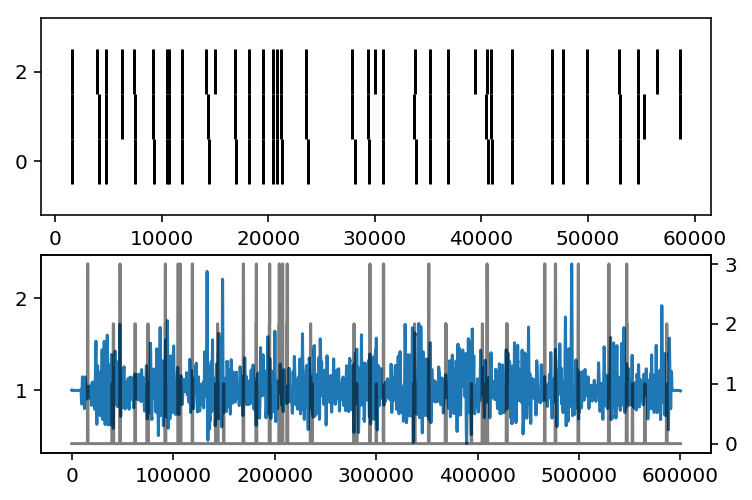

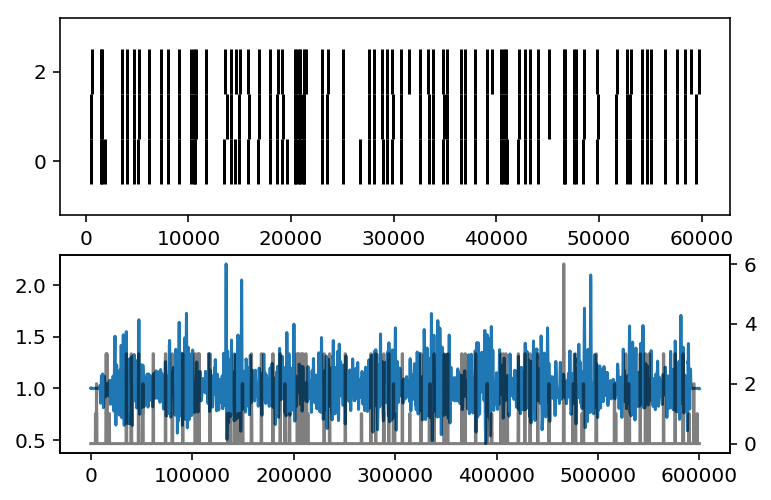

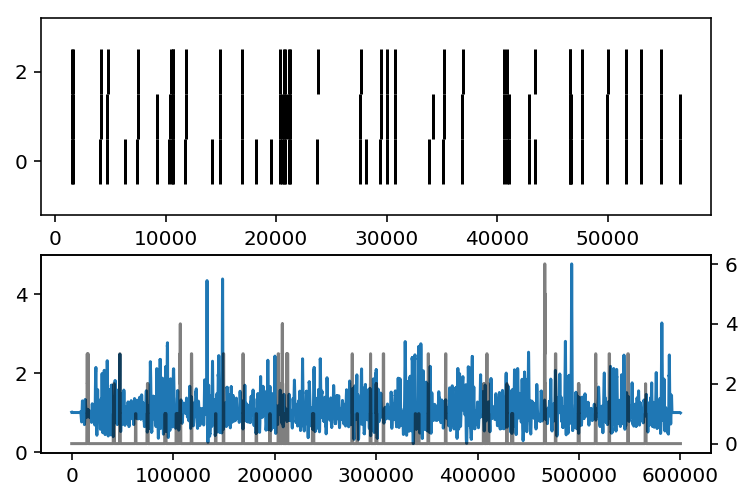

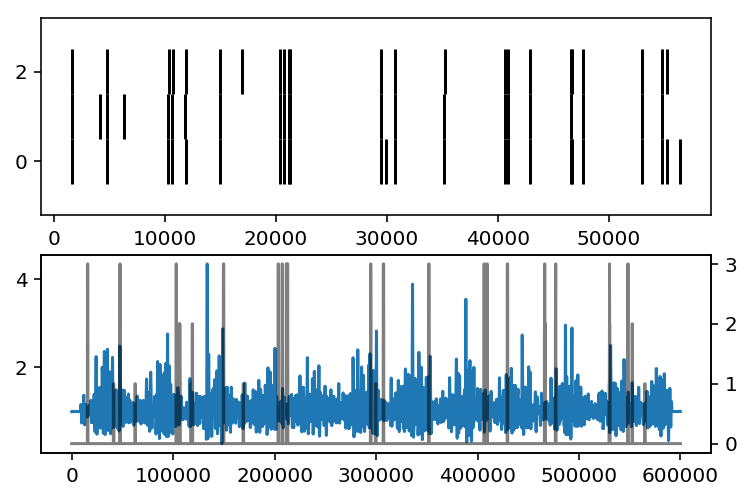

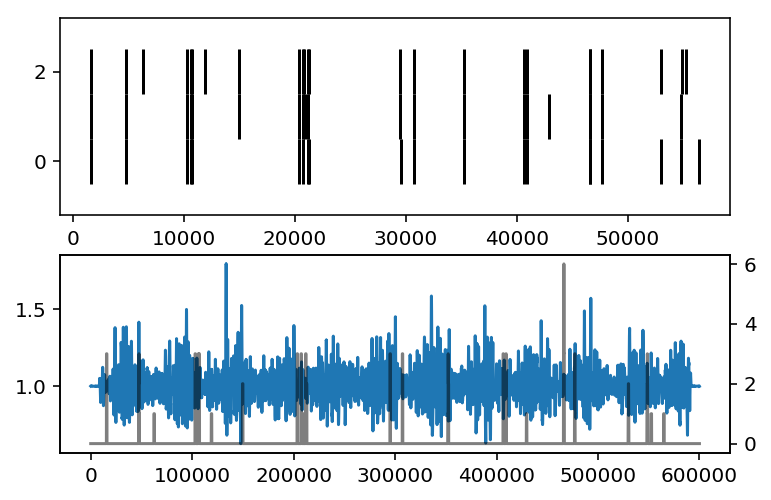

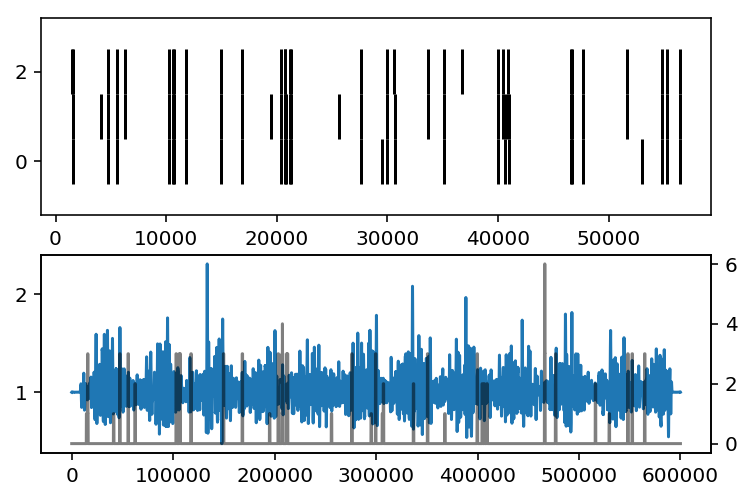

In [11]:
for i, name_ in enumerate(pref_stim['names']):
    for expt in experiments:
        if expt.name == name_:
            break
    assert expt.name == name_
    #pref_stim['mean'][i] - pref_stim['mean'][i].mean()#
    centered_template = pref_stim['mean'][i][1000:] - pref_stim['mean'][i][1000:].mean()
    centered_stim = expt.trainingset_traces[0].I - expt.trainingset_traces[0].I.mean()
    
    xcov = np.correlate(centered_template, centered_stim, 'same')
    
    spks = []
    spktrains = []
    for tr in expt.trainingset_traces:
        spks.append(tr.getSpikeTimes())
        spktrains.append(tr.getSpikeTrain())
        
    psth = np.correlate(np.sum(spktrains, axis = 0), np.ones(500), 'same')
    
    plt.figure()
    plt.subplot(211)
    plt.eventplot(spks, color = 'k')
    
    ax = plt.subplot(212)
    plt.plot(np.exp(xcov))
    
    ax2=ax.twinx()
    ax2.plot(psth, 'k-', alpha = 0.5)
    
    plt.show()

This is a pretty quick and dirty analysis, but by eye a high cross-correlation doesn't seem to correspond well to the spike times. Small sample size is probably a big problem here. Note that I'm using $\exp[xcorr]$ because this is a little closer to what a GLM would use.